# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C


### About the columns
* Variable --> Definition --> Key
* survival --> Survival --> 0 = No, 1 = Yes
* pclass --> Ticket class --> 1 = 1st, 2 = 2nd, 3 = 3rd
* sex --> Sex --> 
* Age --> Age in years --> 
* sibsp --> # of siblings / spouses aboard the Titanic --> 
* parch --> # of parents / children aboard the Titanic --> 
* ticket --> Ticket number --> 
* fare --> Passenger fare --> 
* cabin --> Cabin number --> 
* embarked --> Port of Embarkation --> C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
pd.isna(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Now if we sort them for our convinience
(pd.isna(df).sum().sort_values(ascending = False)/len(df)*100).to_frame()

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000


### Here we get to know about the percent of missing valued from each column, and will also treat them as required.

C:\Users\Rohan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

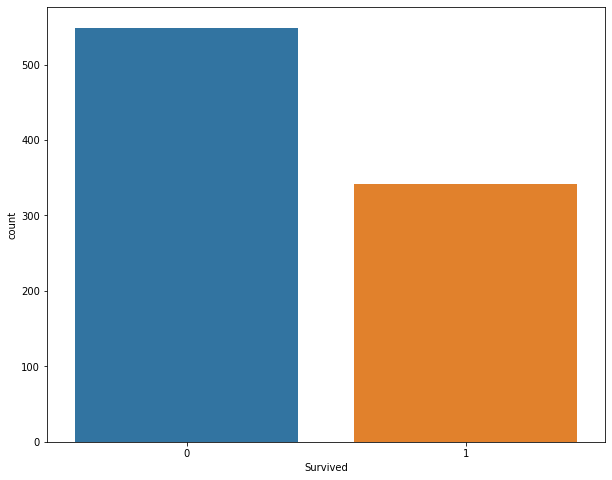

In [9]:
plt.figure(figsize = (10,8))
sns.countplot(df.Survived)

Total percentage of survivors = 38.38383838383838
Total percentage of deaths = 61.61616161616161


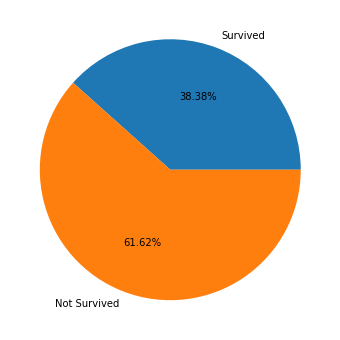

In [10]:
survived_perc=len(df[df.Survived == 1])/len(df)*100
non_survived_perc = len(df[df.Survived == 0])/len(df)*100
print(f"Total percentage of survivors = {survived_perc}")
print(f"Total percentage of deaths = {non_survived_perc}")
plt.figure(figsize = (8,6))
plt.pie([survived_perc,non_survived_perc],labels = ["Survived","Not Survived"], autopct='%.2f%%')
plt.show()

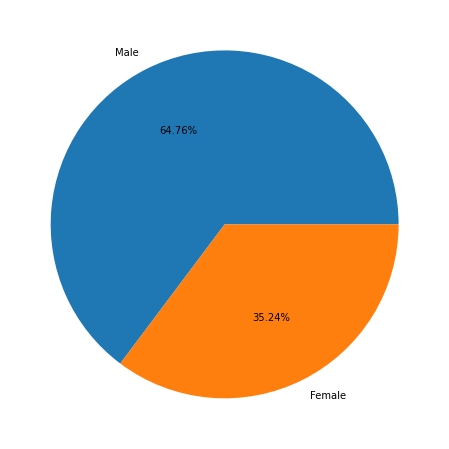

In [11]:
plt.figure(figsize = (10,8))
plt.pie([len(df[df.Sex=='male']),len(df[df.Sex=='female'])],labels = ["Male","Female"], autopct='%.2f%%')
plt.show()

In [12]:
# Maximum and minimum age of passengers
print(f"Maximum Passenger age is = {df.Age.max()} years")
print(f"Minimum Passenger age is = {df.Age.min()} years")

Maximum Passenger age is = 80.0 years
Minimum Passenger age is = 0.42 years


<AxesSubplot:xlabel='Age', ylabel='Survived'>

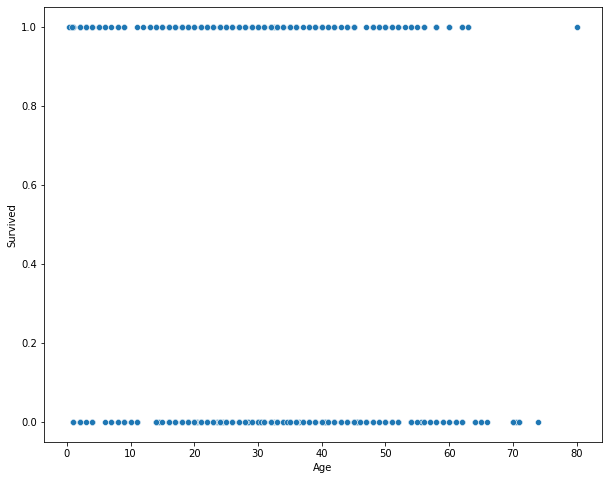

In [13]:
# Is survival rate has any corelation with age ??
plt.figure(figsize=(10,8))
sns.scatterplot(x= df.Age, y=df.Survived)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

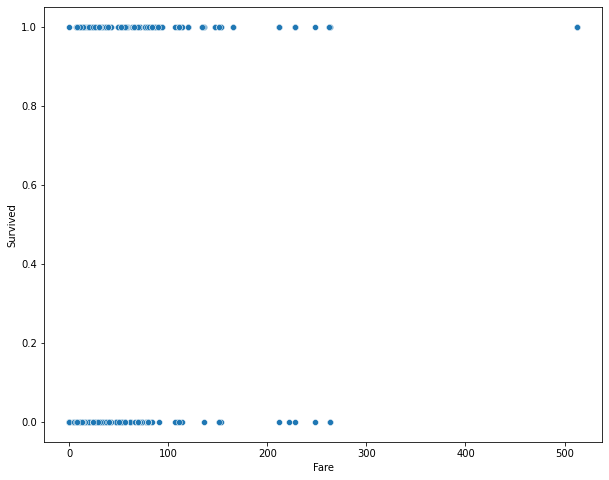

In [14]:
# Is survival rate has any corelation with fare ??
plt.figure(figsize=(10,8))
sns.scatterplot(x= df.Fare, y=df.Survived)

#### As we can see from above the survival rate doesn't depends upon the age or fare rate we can also conclude that the survival rate is not biased

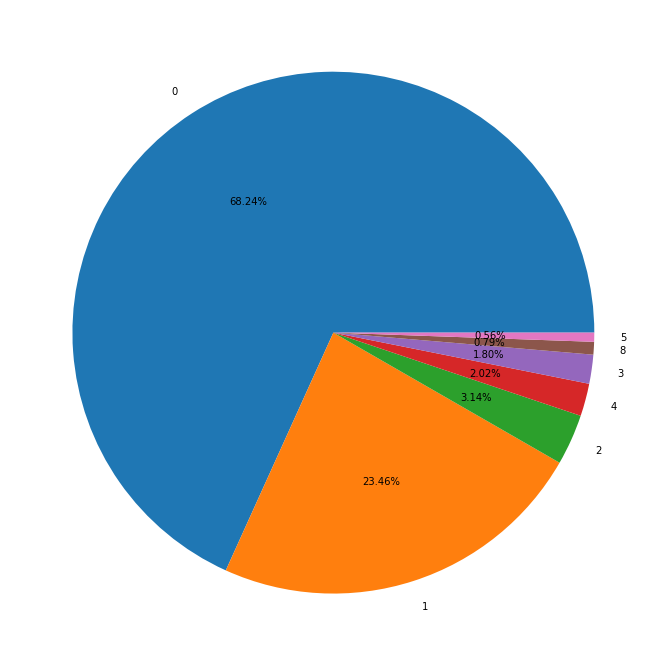

In [15]:
plt.figure(figsize = (15,12))
plt.pie(df.SibSp.value_counts().values,labels = df.SibSp.value_counts().index, autopct='%.2f%%')
plt.show()

<AxesSubplot:>

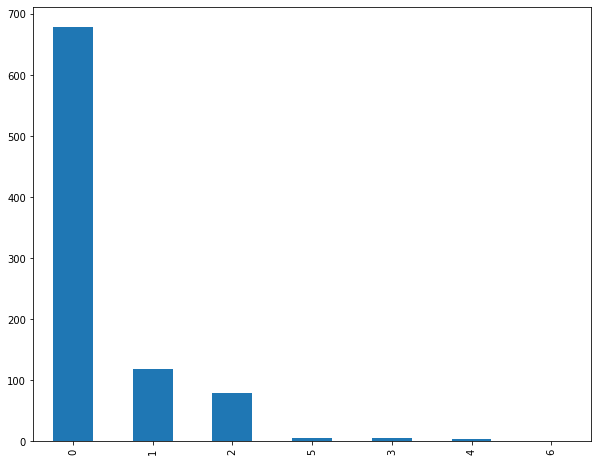

In [16]:
# number of parents and children on board
plt.figure(figsize = (10,8))
df.Parch.value_counts().plot.bar()

## From the above plots we can state that the most number of people who boarded the ship were single as the max number have no siblings (can state that most were single child) or spouce and most have no parents along them.

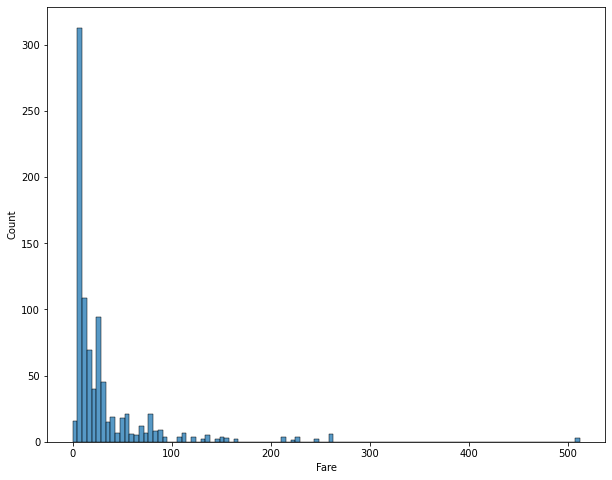

In [17]:
plt.figure(figsize = (10,8))
sns.histplot(df['Fare']);

## Thus most of the fare was around 0 - 100 $ at that time

# Preparing data for Machine Learning

In [18]:
df['Parch'] = df['Parch'].astype(float)
df['SibSp'] = df['SibSp'].astype(float)

In [19]:
features = df.drop('Survived',axis=1)
labels = df['Survived'].values

In [20]:
num_cols = [col for col in features.columns 
                if features[col].dtype in ['float']]

In [21]:
print(num_cols)

['Age', 'SibSp', 'Parch', 'Fare']


In [22]:
cat_cols = [col for col in features.columns
                if col not in num_cols
                #checking for cardinal val which should be < 10
                and df[col].unique().shape[0]<10]
print(cat_cols)

['Pclass', 'Sex', 'Embarked']


In [23]:
df[cat_cols].head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [24]:
df[num_cols].head()

,Age,SibSp,Parch,Fare
0,22.0,1.0,0.0,7.2500
1,38.0,1.0,0.0,71.2833
2,26.0,0.0,0.0,7.9250
3,35.0,1.0,0.0,53.1000
4,35.0,0.0,0.0,8.0500


### Imputing numerical columns

In [25]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

#### Option 1 - Fillna

In [26]:
features['Age'].fillna(features['Age'].mean()).values

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [27]:
features[num_cols].fillna(features['Age'].mean()).isna().sum()

Age      0
SibSp    0
Parch    0
Fare     0
dtype: int64

#### Option 2 - (Preffered)

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [29]:
imputer = SimpleImputer(strategy = 'mean')

In [30]:
imputer.fit_transform(features[num_cols])

array([[22.        ,  1.        ,  0.        ,  7.25      ],
       [38.        ,  1.        ,  0.        , 71.2833    ],
       [26.        ,  0.        ,  0.        ,  7.925     ],
       ...,
       [29.69911765,  1.        ,  2.        , 23.45      ],
       [26.        ,  0.        ,  0.        , 30.        ],
       [32.        ,  0.        ,  0.        ,  7.75      ]])

In [31]:
# Making a numerical data preprocessing pipeline

from sklearn.preprocessing import StandardScaler

num_pipeline= Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

In [32]:
num_pipeline.fit_transform(features[num_cols])

array([[-0.5924806 ,  0.43279337, -0.47367361, -0.50244517],
       [ 0.63878901,  0.43279337, -0.47367361,  0.78684529],
       [-0.2846632 , -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.        ,  0.43279337,  2.00893337, -0.17626324],
       [-0.2846632 , -0.4745452 , -0.47367361, -0.04438104],
       [ 0.17706291, -0.4745452 , -0.47367361, -0.49237783]])

In [33]:
features[cat_cols].head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [34]:
features[cat_cols].isna().sum()

Pclass      0
Sex         0
Embarked    2
dtype: int64

In [35]:
features['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
features['Embarked'].fillna('S').isna().sum()

0

#### Creating Custom Imputer

#### One Hot Encoding

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent = pd.Series([X[c].value_counts().index[0] for c in X], index = X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent)

In [38]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('cat_imputer',MostFrequentImputer()),
    ('one_hot',OneHotEncoder(sparse = False)),
])

In [39]:
cat_pipeline.fit_transform(features[cat_cols])

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [40]:
cat_pipeline.get_params()

{'memory': None,
 'steps': [('cat_imputer', MostFrequentImputer()),
  ('one_hot', OneHotEncoder(sparse=False))],
 'verbose': False,
 'cat_imputer': MostFrequentImputer(),
 'one_hot': OneHotEncoder(sparse=False),
 'one_hot__categories': 'auto',
 'one_hot__drop': None,
 'one_hot__dtype': numpy.float64,
 'one_hot__handle_unknown': 'error',
 'one_hot__sparse': False}

In [41]:
X_num = num_pipeline.fit_transform(features[num_cols])
X_cat = cat_pipeline.fit_transform(features[cat_cols]) #.toarray()

In [42]:
X_final = np.c_[X_num,X_cat]

In [43]:
print(X_final[:5])

[[-0.5924806   0.43279337 -0.47367361 -0.50244517  0.          0.
   1.          0.          1.          0.          0.          1.        ]
 [ 0.63878901  0.43279337 -0.47367361  0.78684529  1.          0.
   0.          1.          0.          1.          0.          0.        ]
 [-0.2846632  -0.4745452  -0.47367361 -0.48885426  0.          0.
   1.          1.          0.          0.          0.          1.        ]
 [ 0.40792596  0.43279337 -0.47367361  0.42073024  1.          0.
   0.          1.          0.          0.          0.          1.        ]
 [ 0.40792596 -0.4745452  -0.47367361 -0.48633742  0.          0.
   1.          0.          1.          0.          0.          1.        ]]


In [44]:
X_final.shape

(891, 12)

In [45]:
#Splitting the data into training and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_final,labels,test_size = 0.2,random_state = 1234)

In [46]:
print(f'Training set shape : {X_train.shape}')
print(f'Testing set shape : {X_test.shape}')

Training set shape : (712, 12)
Testing set shape : (179, 12)


In [47]:
print("Features : ",X_train[:5])
print("Labels : ",y_train[:5])

Features :  [[-1.36202411  0.43279337 -0.47367361 -0.42207354  0.          0.
   1.          0.          1.          1.          0.          0.        ]
 [-2.21467831  0.43279337  2.00893337  2.40299019  1.          0.
   0.          0.          1.          0.          0.          1.        ]
 [ 1.63919557 -0.4745452  -0.47367361 -0.50638754  0.          0.
   1.          0.          1.          0.          0.          1.        ]
 [ 0.         -0.4745452  -0.47367361  0.48910361  0.          0.
   1.          0.          1.          0.          0.          1.        ]
 [ 0.71574336 -0.4745452  -0.47367361 -0.38667072  0.          1.
   0.          0.          1.          0.          0.          1.        ]]
Labels :  [1 1 0 1 0]


### Start the Training

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [49]:
dt = DecisionTreeClassifier()

In [50]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
dt.score(X_test,y_test)

0.8100558659217877

In [52]:
dt.score(X_train,y_train)

0.9845505617977528

In [53]:
lr = LogisticRegression()

In [54]:
lr.fit(X_train,y_train)

LogisticRegression()

In [55]:
lr.score(X_train,y_train)

0.800561797752809

In [56]:
lr.score(X_test,y_test)

0.8379888268156425

In [57]:
dt.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [58]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [59]:
sample = X_test[0]
print(sample)

[ 1.10051512 -0.4745452   0.76762988  0.5189714   1.          0.
  0.          1.          0.          1.          0.          0.        ]


In [60]:
dt.predict([sample])

array([1], dtype=int64)

In [61]:
y_test[0]

1

In [62]:
def Prediction(sample):
    res = dt.predict([sample])
    return 'Survived' if res == 1 else 'Not Survived'

In [63]:
Prediction(X_test[18])

'Not Survived'

## Cross - Validation

In [64]:
lr = LogisticRegression()

In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr,X_train,y_train,cv=5)
print(scores.mean())
print(scores)

0.8005318625036935
[0.8041958  0.81818182 0.79577465 0.78873239 0.79577465]


In [66]:
#Trying it with decision tree
dt = DecisionTreeClassifier()

scores = cross_val_score(dt,X_train,y_train,cv=5)
print(scores.mean())
print(scores)

0.785166945730326
[0.77622378 0.75524476 0.76760563 0.78169014 0.84507042]


In [67]:
print(f'Decision tree params : {dt.get_params()}')

Decision tree params : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [68]:
print(f'Logistic Regression Parameters : {lr.get_params()}')

Logistic Regression Parameters : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### Hyperparameter Optimization

In [69]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [70]:
grid = {
    'solver' : ['newton-cg','lbfgs','liblinear'],
    'penalty' : ['l2'],
    'C' : [100,10,1.0,0.1,0.01]
}

lr = LogisticRegression()
grid_search = GridSearchCV(estimator = lr,param_grid = grid,return_train_score = True,n_jobs=-1,cv =5,scoring='accuracy',error_score = 0)

In [71]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, scoring='accuracy')

In [72]:
grid_search.score(X_train,y_train)

0.8047752808988764

In [73]:
grid_search.score(X_test,y_test)

0.8435754189944135

In [74]:
grid_search.cv_results_['mean_test_score'].mean()

0.7908099412324764

In [75]:
grid_search.cv_results_['mean_train_score'].mean()

0.7946369849638742

In [76]:
lr = LogisticRegression()

rnd = RandomizedSearchCV(lr,grid,return_train_score = True,n_jobs=-1,cv =5,scoring='accuracy',error_score = 0)


In [77]:
rnd.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=0, estimator=LogisticRegression(),
                   n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   return_train_score=True, scoring='accuracy')

In [78]:
rnd.score(X_train,y_train)

0.8047752808988764

In [79]:
rnd.score(X_test,y_test)

0.8435754189944135

In [80]:
rnd.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [81]:
rnd.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}

In [82]:
arr = [1,2,3,4,5,6,7,8]
np.array_split(arr,2)

[array([1, 2, 3, 4]), array([5, 6, 7, 8])]

In [83]:
hold = None

for value in np.array_split(arr,4):
    hold = list(value)
    train_data = list(map(list,list(np.array_split(arr,4))))
    print(f'hold val : {hold} \ntrain val : {train_data}')

hold val : [1, 2] 
train val : [[1, 2], [3, 4], [5, 6], [7, 8]]
hold val : [3, 4] 
train val : [[1, 2], [3, 4], [5, 6], [7, 8]]
hold val : [5, 6] 
train val : [[1, 2], [3, 4], [5, 6], [7, 8]]
hold val : [7, 8] 
train val : [[1, 2], [3, 4], [5, 6], [7, 8]]


In [84]:
def custom_cross_val(data,model,cv=5):
    splited_array = np.array_split(data,cv)
    hold_val = None
    for arr in splited_array:
        hold_val = arr